In [4]:
import numpy as np
from sklearn.datasets import make_classification, make_moons, make_circles, make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
import matplotlib.pyplot as plt

In [5]:
def plot_decision_boundary(ax, model, X, y, title="Decision Boundary"):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    grid = np.c_[xx.ravel(), yy.ravel()]
    preds = model.predict(grid).reshape(xx.shape)

    ax.contourf(xx, yy, preds, alpha=0.3, cmap=plt.cm.Paired)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
    ax.set_title(title)

def evaluate_classification(model, X_train, y_train, X_test, y_test, dataset_name="Dataset"):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{dataset_name} - Accuracy: {acc:.2f}")


    fig, ax = plt.subplots(figsize=(6,5))
    plot_decision_boundary(ax, model, X_train, y_train, f"{dataset_name} - Decision Boundary")
    plt.show()

def evaluate_regression(model, X_train, y_train, X_test, y_test, dataset_name="Dataset"):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{dataset_name} - MSE: {mse:.2f}")


    plt.scatter(y_test, y_pred)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel("True values")
    plt.ylabel("Predicted values")
    plt.title(f"{dataset_name} - Predicted vs True")
    plt.show()

## 1. **What KNN is**

* KNN is a **lazy learning algorithm**: it doesn’t learn weights or parameters.
* It **memorizes the training data**.
* Prediction is made by looking at the **k nearest neighbors** of a query point and using their labels:

  * **Classification:** majority vote of neighbors.
  * **Regression:** average of neighbors’ target values.

---

## 2. **Key concepts of KNN**

1. **Store training data**

   * Keep `X_train` and `y_train` in memory.

2. **Distance metric**

   * Define a way to measure distance between points. Common choices:

     * Euclidean distance: $d(x_i, x_j) = \sqrt{\sum_k (x_{ik} - x_{jk})^2}$
     * Manhattan distance: $d(x_i, x_j) = \sum_k |x_{ik} - x_{jk}|$
   * You can allow **different distance metrics** via a parameter.

3. **Finding nearest neighbors**

   * For each test point, compute distance to **all training points**.
   * Sort distances and select the **k smallest** → these are the nearest neighbors.

4. **Prediction**

   * **Classification:** take the majority label among the neighbors.
   * **Regression:** take the mean (or weighted mean) of neighbors’ values.

5. **Optional weighting**

   * You can weight neighbors by **inverse distance** so closer points have more influence.

6. **Hyperparameters**

   * `k` → number of neighbors to consider.
   * `distance_metric` → Euclidean, Manhattan, etc.
   * `weights` → uniform or distance-based.


In [6]:
def euclidean_distance(xi:np.array,xj:np.array):
    return np.sqrt(np.sum((xi-xj)**2))

class KNN:
    def __init__(self,k, metric=euclidean_distance,weights='uniform',mode = 'reg'):
        self.k = k
        self.metric = metric
        self.weights = weights
        self.mode = mode

    def fit(self, X_train, y_train):
        self.X_train = np.array(X_train)
        self.y_train = np.array(y_train)


    def predict(self,X):
        X = np.atleast_2d(X)
        predictions = []
        for x in X:
            dists = np.array([self.metric(x, xi) for xi in self.X_train])

            nn_idx = np.argsort(dists)[:self.k]
            nn_y = self.y_train[nn_idx]
            nn_dists = dists[nn_idx]


            if self.weights == 'distance':

                nn_dists = np.where(nn_dists == 0, 1e-10, nn_dists)
                weights = 1 / nn_dists
            else:
                weights = np.ones_like(nn_y)

            if self.mode == 'reg':
                pred = np.average(nn_y, weights=weights)
            else:
                classes = np.unique(nn_y)
                class_votes = []
                for c in classes:
                    class_votes.append(np.sum(weights[nn_y == c]))
                pred = classes[np.argmax(class_votes)]

            predictions.append(pred)

        return np.array(predictions)


Linear Classification Dataset - Classification Test
Linear Classification - Accuracy: 0.96


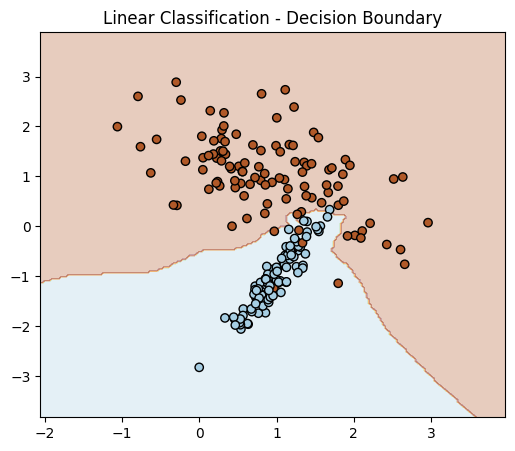


Moons Dataset - Classification Test
Moons - Accuracy: 0.98


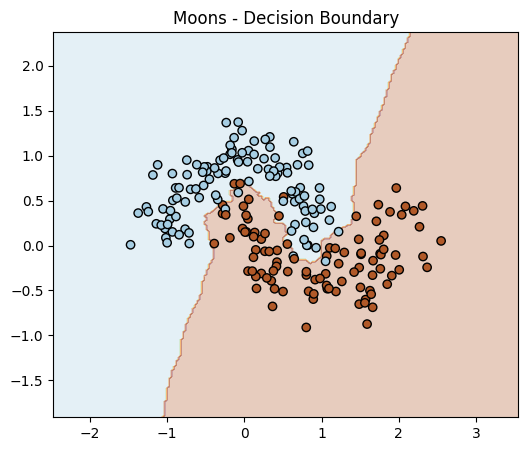


Circles Dataset - Classification Test
Circles - Accuracy: 0.90


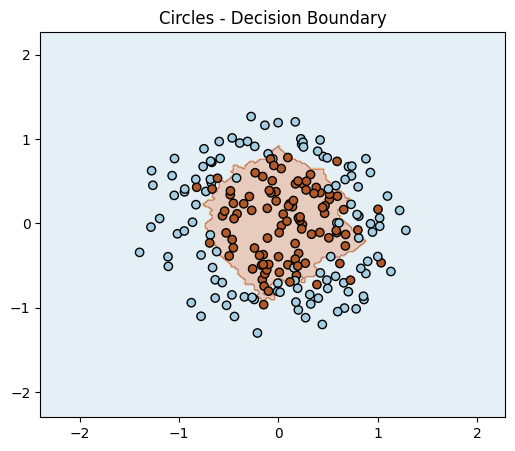


Synthetic Regression Dataset Test
Regression - MSE: 147.73


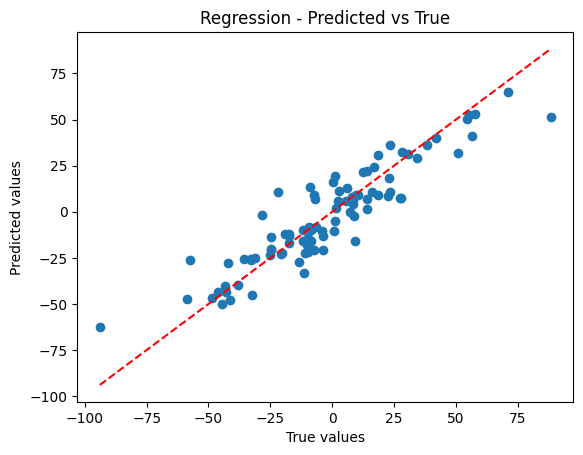

In [7]:
datasets_class = [
    ("Linear Classification", make_classification(n_samples=300, n_features=2, n_classes=2,
                                                  n_informative=2, n_redundant=0,
                                                  n_clusters_per_class=1, random_state=42)),
    ("Moons", make_moons(n_samples=300, noise=0.2, random_state=42)),
    ("Circles", make_circles(n_samples=300, noise=0.2, factor=0.5, random_state=42))
]

for name, (X, y) in datasets_class:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    model = KNN(k=5, weights='uniform', mode='class')
    print(f"\n{name} Dataset - Classification Test")
    evaluate_classification(model, X_train, y_train, X_test, y_test, name)


X, y = make_regression(n_samples=300, n_features=1, noise=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = KNN(k=5, weights='distance', mode='reg')
print("\nSynthetic Regression Dataset Test")
evaluate_regression(model, X_train, y_train, X_test, y_test, "Regression")